In [3]:
import pandas as pd

In [4]:
table = pd.read_csv('HR.csv')

In [5]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
table.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
table['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [7]:
help_table = (pd.DataFrame(
    {'name': ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary'], 
     'mean': [0, 0, 0, 0, 0, 0, 0, 0, None, None],
     'median': [0, 0, 0, 0, 0, 0, 0, 0, None, None],
     'moda': [0, 0, 0, 0, 0, 0, 0, 0, None, None],
     'min': [0, 0, 0, 0, 0, 0, 0, 0, None, None],
     'max': [0, 0, 0, 0, 0, 0, 0, 0, None, None],
     'average_deviation': [0, 0, 0, 0, 0, 0, 0, 0, None, None]})
             )

In [8]:
help_table.head(10) 

,name,mean,median,moda,min,max,average_deviation
0,satisfaction_level,0.0,0.0,0.0,0.0,0.0,0.0
1,last_evaluation,0.0,0.0,0.0,0.0,0.0,0.0
2,number_project,0.0,0.0,0.0,0.0,0.0,0.0
3,average_montly_hours,0.0,0.0,0.0,0.0,0.0,0.0
4,time_spend_company,0.0,0.0,0.0,0.0,0.0,0.0
5,Work_accident,0.0,0.0,0.0,0.0,0.0,0.0
6,left,0.0,0.0,0.0,0.0,0.0,0.0
7,promotion_last_5years,0.0,0.0,0.0,0.0,0.0,0.0
8,sales,NaN,NaN,NaN,NaN,NaN,NaN
9,salary,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def mean_(row):
    if row['name'] not in ('sales', 'salary'):
        return(table[row['name']].mean())
help_table['mean'] = help_table.apply(mean_, axis=1)

In [10]:
def median_(row):
    if row['name'] not in ('sales', 'salary'):
        return(table[row['name']].median())
help_table['median'] = help_table.apply(median_, axis=1)

In [11]:
def moda_(row):
    return(table[row['name']].mode())
help_table['moda'] = help_table.apply(moda_, axis=1)

In [12]:
def min_(row):
    if row['name'] not in ('sales', 'salary'):
        return(table[row['name']].min())
help_table['min'] = help_table.apply(min_, axis=1)

In [13]:
def max_(row):
    if row['name'] not in ('sales', 'salary'):
        return(table[row['name']].max())
help_table['max'] = help_table.apply(max_, axis=1)

In [14]:
def std_(row):
    if row['name'] not in ('sales', 'salary'):
        return(table[row['name']].std(axis = 0, skipna = True))
help_table['average_deviation'] = help_table.apply(std_, axis=1)

In [15]:
help_table.head(10)

,name,mean,median,moda,min,max,average_deviation
0,satisfaction_level,0.612834,0.64,0.1,0.09,1.0,0.248631
1,last_evaluation,0.716102,0.72,0.55,0.36,1.0,0.171169
2,number_project,3.803054,4.00,4,2.00,7.0,1.232592
3,average_montly_hours,201.050337,200.00,135,96.00,310.0,49.943099
4,time_spend_company,3.498233,3.00,3,2.00,10.0,1.460136
5,Work_accident,0.144610,0.00,0,0.00,1.0,0.351719
6,left,0.238083,0.00,0,0.00,1.0,0.425924
7,promotion_last_5years,0.021268,0.00,0,0.00,1.0,0.144281
8,sales,NaN,NaN,sales,NaN,NaN,NaN
9,salary,NaN,NaN,low,NaN,NaN,NaN


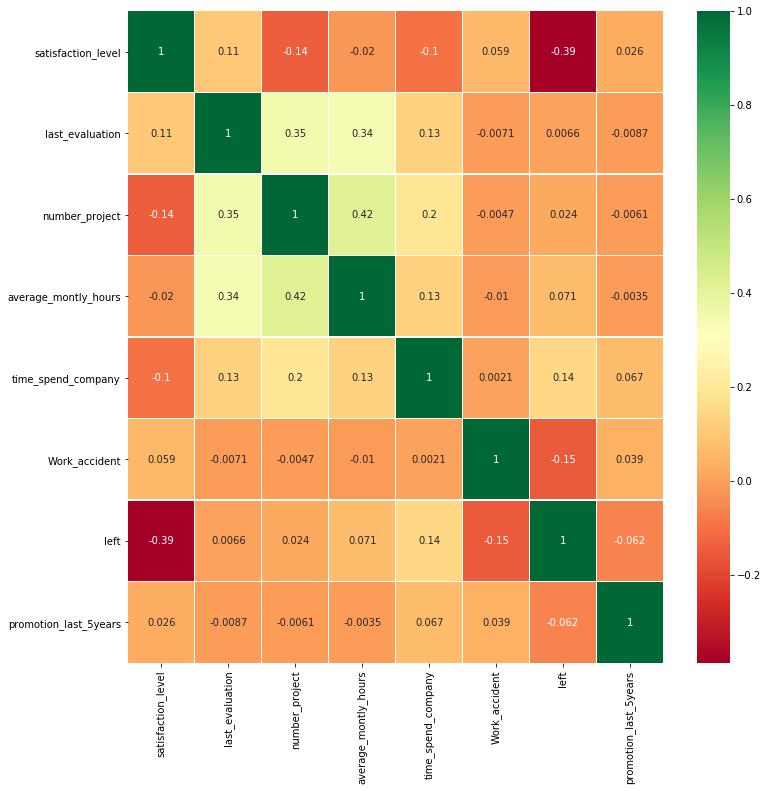

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(table.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

По корреляционной матрице можно сделать вывод, что чем выше уровень удоволетворенности работой, тем меньше увольнений.

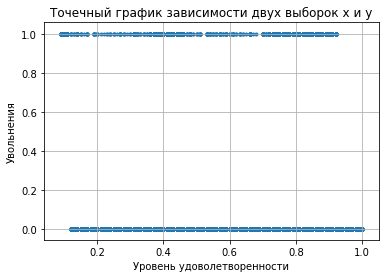

In [17]:
satisfaction_level = table['satisfaction_level']
left = table['left']
plt.xlabel('Уровень удоволетворенности')
plt.ylabel('Увольнения')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(satisfaction_level, left, marker='.')

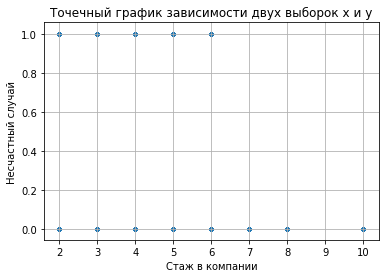

In [18]:
time_spend_company = table['time_spend_company']
Work_accident = table['Work_accident']
plt.xlabel('Стаж в компании')
plt.ylabel('Несчастный случай')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(time_spend_company, left, marker='.')

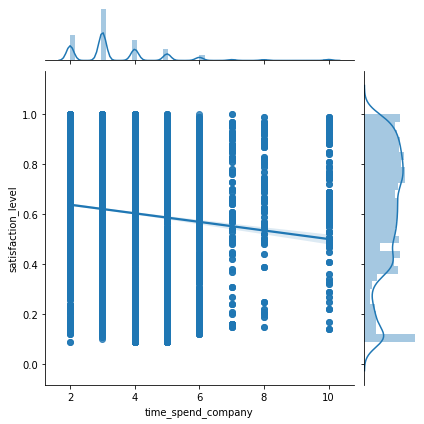

In [30]:
sns.jointplot(x='time_spend_company', y='satisfaction_level', 
              data=table, kind='reg')

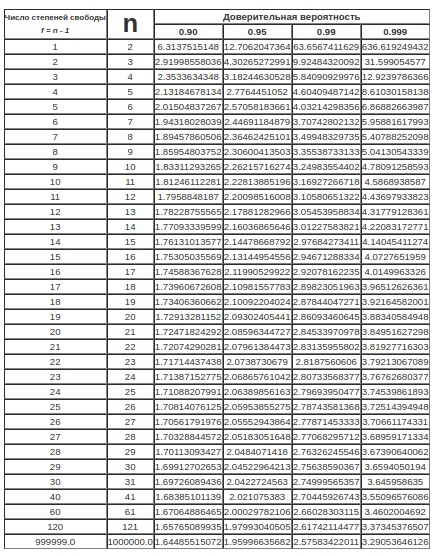

In [31]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

In [68]:
from scipy import stats
stats.ttest_1samp(table.time_spend_company, table['promotion_last_5years'].mean())

Ttest_1sampResult(statistic=291.633970466972, pvalue=0.0)

t-value = 291.633970466972, мы его сравниваем с табличным значением 1.95 (или число от 1.95 до 1.97, так как нет 14999 в таблице) (alpha = 0.05, N=14998). Так как значение t-value превышает 1.95, то мы отвергаем нулевую гипотезу (о том, что средние значения выборок равны).

In [59]:
stats.ttest_1samp(table['average_montly_hours'], table['time_spend_company'].mean())

Ttest_1sampResult(statistic=484.43701620910207, pvalue=0.0)

t-value = 484.43701620910207, мы его сравниваем с табличным значением 1.95 (или число от 1.95 до 1.97, так как нет 14999 в таблице) (alpha = 0.05, N=14998). Так как значение t-value превышает 1.95, то мы отвергаем нулевую гипотезу (о том, что средние значения выборок равны).

In [62]:
stats.ttest_1samp(table['time_spend_company'], table['last_evaluation'].mean())

Ttest_1sampResult(statistic=233.35409415103655, pvalue=0.0)

t-value = 233.35409415103655, мы его сравниваем с табличным значением 1.95 (или число от 1.95 до 1.97, так как нет 14999 в таблице) (alpha = 0.05, N=14998). Так как значение t-value превышает 1.95, то мы отвергаем нулевую гипотезу (о том, что средние значения выборок равны).

Рассчитать сколько работников работает в каждом департаменте:

In [77]:
table['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [79]:
table['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Сколько сотрудников покинули компанию: 3571

In [81]:
table.salary.value_counts()
# sns.distplot(table.salary)

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [95]:
def salary_(row):
    if row['salary'] == 'low':
        return 1
    if row['salary'] == 'medium':
        return 2
    if row['salary'] == 'high':
        return 3
table_salary = table.apply(salary_, axis=1)
table_salary.head(-1)

0        1
1        2
2        2
3        1
4        1
        ..
14993    1
14994    1
14995    1
14996    1
14997    1
Length: 14998, dtype: int64

1 - Зарплата низкая
2 - Зарплата среденяя
3 - Зарплата высокая

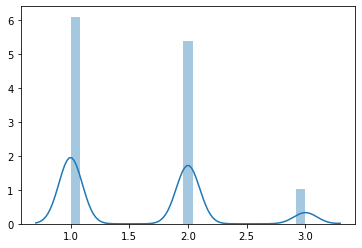

In [93]:
sns.distplot(table_salary)

In [171]:
table.reset_index(inplace = True

In [175]:
table.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low


In [176]:
table_salary_dep = pd.DataFrame()
def salary_dep(row):
    for var in ["sales", "technical", "support", "IT", "product_mng", "marketing", "RandD", "accounting", "hr", "management"]:
        if row['sales'] != var:
            table_salary_dep.loc[row[0], var] = None
    table_salary_dep.loc[row[0], row['sales']] = salary_(row)
table.apply(salary_dep, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
14994    None
14995    None
14996    None
14997    None
14998    None
Length: 14999, dtype: object

In [177]:
table_salary_dep.head(-1)

,technical,support,IT,product_mng,marketing,RandD,accounting,hr,management,sales
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...
14993,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14994,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14995,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14996,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
import researchpy as rp

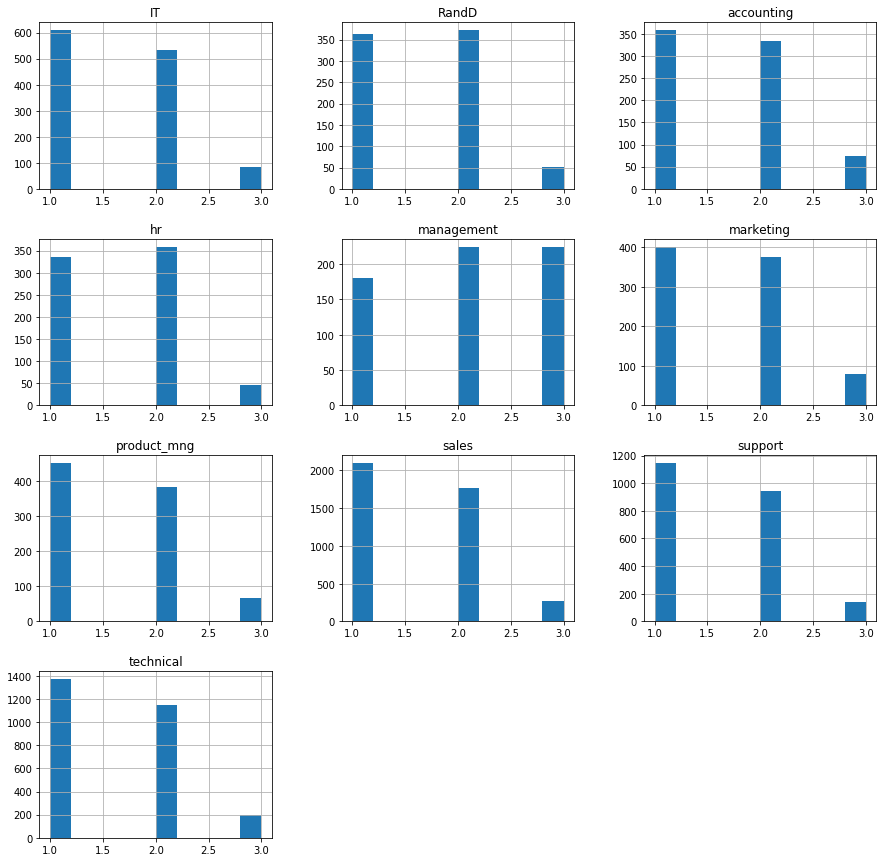

In [178]:
table_salary_dep.hist(figsize=(15,15))
plt.show()

**1 Гипотеза:**
Люди увольняются из-за маленькой з/п

In [223]:
peop_low = table[table['salary']=='low'].left
peop_all = table[table['salary']!='low'].left

In [224]:
descriptives, results = rp.ttest(peop_low, peop_all)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7316.0  0.296884  0.456916  0.005342   0.286412  0.307355
1      left   7683.0  0.182090  0.385944  0.004403   0.173459  0.190722
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.1148
1        Degrees of freedom =   14997.0000
2                         t =      16.6501
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.2720
7                 Hedge's g =       0.2720
8             Glass's delta =       0.2512
9                         r =       0.1347


p value = 0.0000, то отличие людей с показателем salary = low значительное

In [225]:
stats.ttest_ind(peop_low, peop_all)

Ttest_indResult(statistic=16.650146684409187, pvalue=1.0799936831829457e-61)

Значит, люди с показателем salary = low увольняются чаще, чем остальные

**2 Гипотеза:** Люди увольняются из-за маленького уровня удовлетворенности


In [230]:
peop_low = table[table['satisfaction_level'] < 0.5].left
peop_all = table[table['satisfaction_level'] >= 0.5].left

In [231]:
descriptives, results = rp.ttest(peop_low, peop_all)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   4583.0  0.555750  0.496936  0.007341   0.541359  0.570140
1      left  10416.0  0.098310  0.297748  0.002917   0.092592  0.104029
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.4574
1        Degrees of freedom =   14997.0000
2                         t =      69.7174
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       1.2358
7                 Hedge's g =       1.2357
8             Glass's delta =       0.9205
9                         r =       0.4947


p value = 0.0000, то отличие людей с показателем satisfaction_level < 0.5 значительное

In [232]:
stats.ttest_ind(peop_low, peop_all)

Ttest_indResult(statistic=69.71740951406812, pvalue=0.0)

Значит, люди с показателем satisfaction_level < 0.5 увольняются чаще, чем остальные

**3 Гипотеза:** Люди увольняются из-за большого кол-ва часов работы

In [235]:
peop_high = table[table['average_montly_hours'] >= 200].left
peop_all = table[table['average_montly_hours'] < 200].left

In [237]:
descriptives, results = rp.ttest(peop_high, peop_all)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7533.0  0.254215  0.435448  0.005017   0.244380  0.264050
1      left   7466.0  0.221806  0.415489  0.004809   0.212379  0.231232
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.0324
1        Degrees of freedom =   14997.0000
2                         t =       4.6627
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.0761
7                 Hedge's g =       0.0761
8             Glass's delta =       0.0744
9                         r =       0.0380


p value = 0.0000, то отличие людей с показателем average_montly_hours >= 200 значительное

In [238]:
stats.ttest_ind(peop_high, peop_all)

Ttest_indResult(statistic=4.662662049469355, pvalue=3.1483597380393765e-06)

Значит, люди с показателем average_montly_hours >= 200 увольняются чаще, чем остальные

Основные выводы: 
1. По корреляционной матрице:
1.1 Чем выше уровень удоволетворенности работой, тем меньше увольнений.
1.2 Наблюдается прямая корреляция между номером проекта и последней оценкой, также между номером проекта и кол-вом часов в мес.
2. По визуалицации данных:
2.1 Есть некоторая обратная взаимосвязь между удовлетворенностью работой и стажем работы в компании.
3. Интересный факт, что в менеджменте компании примерно одиковое кол-во людей получают как низкую зп, так и среднюю и высокую. В других отделах больше всего людей с низкой и средней зп. Также стоит отметить, что в product_mng в основном больше людей с низкой зп, хотя по рынку я предпологал, что там будет больше людей с высокой зп.
4. Прочее: выводы по гипотезам представлены под результами.